# Estudo - PDS - Quantização
Lucas Pereira Fernandes - 05/04/2021

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

## Quantização de um sinal

In [50]:
# tamanho do sinal
size = 1.078

In [51]:
t = np.linspace(0,int(size),1000)

In [52]:
f0 = 2.0 # frequencia do sinal
A = 1 # amplitude do sinal

In [69]:
Qb = 2 # bits de quantizacao
Lq = 2**Qb # niveis de quantizacao
Qs = 2*A/Lq # degrau de quantizacao

In [70]:
# funcao lambda para geracao do sinal que
# sera amostrado. Nesse caso uma funcao senoidal
# de frequencia f0 e amplitude A

signal = lambda t : A*np.sin(2*np.pi*f0*t)

In [72]:
# geracao dos sinais continuo, quantizado e de erro
signal_c = signal(t)

#signal_q = np.floor(signal_c/Qs)*Qs+Qs/2 # mid-riser (even)
signal_q = np.round(signal_c/Qs)*Qs # mid-tread (odd)
signal_e = signal_c - signal_q

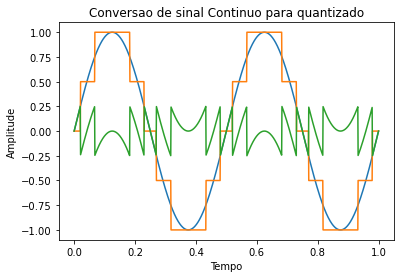

In [73]:
# funcoes de visualizacao do sinal original, do
# sinal quantizado e do sinal de erro entre o sinal
# original e o sinal quantizado
fig = plt.figure ()
plt.plot(t, signal_c)
plt.plot(t, signal_q)
plt.plot(t, signal_e)
plt.title("Conversao de sinal Continuo para quantizado")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")

plt.show()

## Quantização - Imagem

In [138]:
img = image.imread('mi.png')#.astype(float)

In [139]:
print(img.dtype)
print(img.shape)
print(type(img))

float32
(1280, 720, 3)
<class 'numpy.ndarray'>


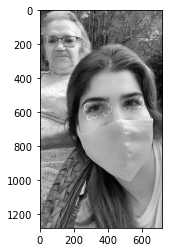

In [140]:
plt.imshow(img[:,:,0], cmap=plt.get_cmap('gray'))

In [141]:
img_int = (img[:,:,0]*255.0).astype(np.uint8)
print(img_int.dtype)
out = np.zeros((1280,720))

mask = np.array([1,1,0,0,0,0,0,0], dtype=np.uint8)
for i in range(0,1280):
  for j in range(0,720):
    out[i,j] = np.packbits(np.unpackbits(img_int[i,j])*mask)

uint8


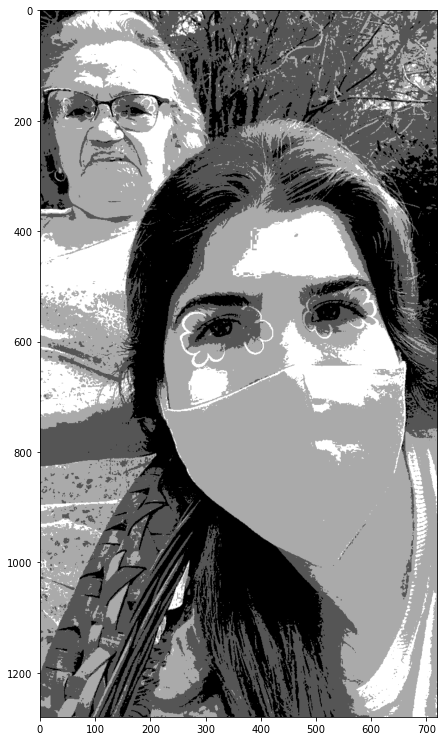

In [142]:
fig = plt.figure(figsize=(13,13))
plt.imshow(out, cmap=plt.get_cmap('gray'))

In [143]:
out[0]

array([  0.,   0.,   0.,   0.,  64.,  64.,  64.,  64.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  64.,  64.,   0.,   0.,   0.,  64.,
        64.,  64.,  64.,  64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  64.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  64.,  64.,  64.,   0.,   0.,   0.,   0.,  64.,
         0.,   0.,   0.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 192., 192., 128., 128.,
       128., 192., 192., 192., 192., 192., 192., 128., 128., 128., 192.,
       192., 192., 192., 192., 192., 192., 192., 192., 192., 192., 192.,
       192., 192., 192., 192., 128.,  64.,  64.,  64.,  64.,  64., 128.,
       192., 192., 192., 192., 192., 192., 192., 192., 192., 192., 192.,
       192., 128., 192., 192., 192., 192., 192., 19